# **1. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

In [ ]:
file_path = "final_dataset_with_fraud_label.csv" 
df = pd.read_csv(file_path)

In [5]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,FraudLabel
0,TX000001,AC00128,4410.297491,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1289.879913,Doctor,5785.579512,1.727144,1.994358e+07,2024-11-04 08:08:08,1,0
1,TX000003,AC00019,37160.145372,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,382.658437,Student,4036.833771,1.727144,4.382466e+06,2024-11-04 08:07:04,0,1
2,TX000004,AC00070,54150.953261,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,507.179032,Student,1868.389053,1.727144,3.342587e+07,2024-11-04 08:09:06,1,0
3,TX000005,AC00411,4223.489090,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,507.179032,Student,13969.709579,1.727144,2.898101e+07,2024-11-04 08:06:39,1,0
4,TX000006,AC00393,27195.084707,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,364.869780,Student,12151.014009,1.727144,3.053796e+06,2024-11-04 08:06:36,0,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [26]:
drop_cols = ['TransactionID', 'AccountID', 'MerchantID', 'DeviceID', 'IPAddress',
    'TransactionDate', 'PreviousTransactionDate', 'Cluster', 'FraudLabel']

In [34]:
categorical_cols = ['CustomerOccupation', 'Channel', 'TransactionType', 'Location', 'IP Address']

In [35]:
X = df.drop(columns=drop_cols, errors='ignore')  # Drop kolom ID + label target
y = df['FraudLabel']

In [36]:
label_encoders = {}
for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

In [37]:
print("Fitur yang digunakan untuk training:")
print(X.columns.tolist())

Fitur yang digunakan untuk training:
['TransactionAmount', 'TransactionType', 'Location', 'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


In [38]:
# Split menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [39]:
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 1496
Jumlah data uji: 642


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [40]:
# Standardisasi Fitur (opsional, tergantung model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Random Forest (Tidak butuh scaling)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

Klasifikasi menggunakan dua algoritma yakni Logistic Regression dan Random Forest
- Alasan penggunaan Logistic Regression adalah karena merupakan model klasifikasi biner yang sederhana, cepat, dan mudah diinterpretasikan. Model ini cocok sebagai baseline awal untuk memetakan hubungan linier antara fitur dengan target fraud, serta memberikan gambaran faktor-faktor penting yang mempengaruhi prediksi.
- Alasan penggunaan Random Forest adalah karena kemampuannya menangani data kompleks dan hubungan non-linear dengan baik.
Sebagai algoritma ensemble, Random Forest lebih tahan terhadap overfitting dan mampu menghasilkan prediksi yang lebih akurat, sambil tetap menyediakan informasi penting terkait kontribusi masing-masing fitur.

## **b. Evaluasi Model Klasifikasi**

In [42]:
# Logistic Regression Evaluation
y_pred_lr = lr_model.predict(X_test_scaled)
print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))

# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       301
           1       0.99      0.99      0.99       341

    accuracy                           0.99       642
   macro avg       0.99      0.99      0.99       642
weighted avg       0.99      0.99      0.99       642


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       341

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



# Logistic Regression
- Akurasi: 0.99
- Precision, Recall, dan F1-Score untuk kedua kelas adalah 0.99
- Performa model sangat baik dan seimbang dalam memprediksi kelas 0 (non-fraud) dan kelas 1 (fraud).
- Cocok sebagai baseline model karena hasilnya tinggi dan stabil.

# Random Forest
- Akurasi: 1.00
- Semua metrik evaluasi (precision, recall, f1-score) mencapai 1.00 di kedua kelas.
- Model memprediksi semua kasus dengan benar, tanpa kesalahan klasifikasi.
- Performa ini menunjukkan bahwa Random Forest menangkap pola data dengan sangat baik, bahkan lebih sempurna dibanding Logistic Regression.

## **c. Tuning Model Klasifikasi (Optional)**

In [43]:
# Tuning Random Forest dengan GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    scoring='f1',
    cv=3,
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)

print("Best Params Random Forest:", grid_search_rf.best_params_)


Best Params Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [44]:
best_rf = RandomForestClassifier(
    max_depth=5,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

=== Evaluasi Setelah Tuning ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       341

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



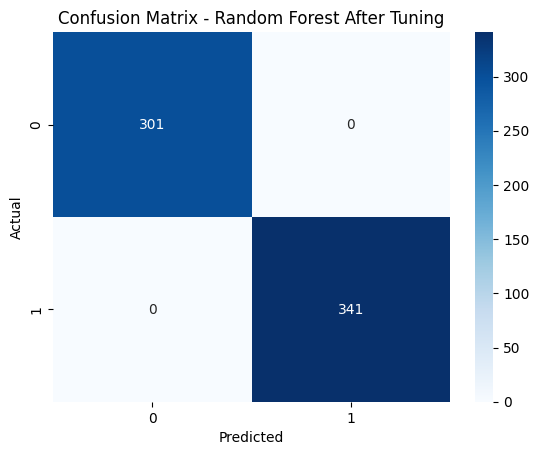

In [45]:
y_pred_best = best_rf.predict(X_test)

# Evaluasi performa
from sklearn.metrics import classification_report, confusion_matrix

print("=== Evaluasi Setelah Tuning ===")
print(classification_report(y_test, y_pred_best))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest After Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
- Perbandingan Sebelum dan Setelah Tuning
Hasilnya tidak berubah secara numerik, namun tuning memastikan bahwa performa optimal dicapai dengan parameter yang lebih terkontrol seperti max_depth=5, yang secara teori lebih aman dari overfitting.
- Identifikasi Kelemahan Model
Model saat ini tidak menunjukkan kelemahan signifikan dari segi metrik. Namun performa sempurna ini juga perlu ditinjau lebih lanjut apakah benar-benar mencerminkan generalisasi yang baik atau justru indikasi overfitting terhadap data yang bersih atau terfilter dengan baik.
- Rekomendasi Tindakan Lanjutan
1. Cross-validation bisa digunakan untuk memastikan model tidak overfit.
2. Coba algoritma lain seperti XGBoost atau LightGBM untuk melihat apakah performa bisa ditingkatkan dengan pendekatan boosting.
3. Pertimbangkan pengujian model pada data mentah tanpa filtering outlier untuk menilai daya generalisasi.

Hasil evaluasi menunjukkan performa optimal pada data uji. Namun, performa yang sangat tinggi juga perlu ditinjau hati-hati, terutama untuk memastikan model tidak hanya belajar dari pola sederhana hasil preprocessing, tapi benar-benar generalizable.